# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = The new email template does not increase the response rate by more than 5% and the standard deviation is less than  .0475

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = The new email template does increase the response rate by more than 5% and the standard deviation is less than  .0475

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [5]:
# Calculate the required sample size
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()


sample_size_requirement = power_analysis.solve_power(effect_size=.1, alpha=.05, power=.8)
print(sample_size_requirement)

1570.7330663315456


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

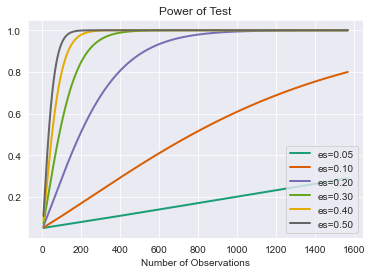

In [8]:
#Your code; plot power curves for the various alpha and effect size combinations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid') #

power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1570)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()

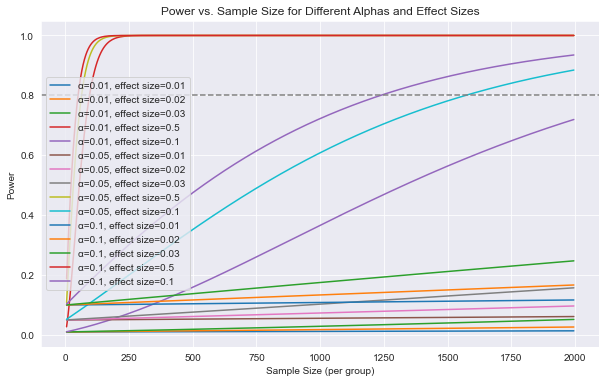

In [15]:
# Define parameters for power analysis
alphas = [0.01, 0.05, 0.1]  # Significance levels
effect_sizes = [0.01, 0.02, 0.03, 0.5, 0.1]  # Response rate differences (effect sizes)
power = 0.8  # Desired power

# Create an instance of TTestIndPower
power_analysis = TTestIndPower()

# Set up the plot
plt.figure(figsize=(10, 6))

# Generate curves for each alpha and effect size
for alpha in alphas:
    for effect_size in effect_sizes:
        # Generate a range of sample sizes
        sample_sizes = np.arange(5, 2000, 5)
        powers = []
        
        # Calculate power for each sample size
        for n in sample_sizes:
            power = power_analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, ratio=1.0, alternative='two-sided')
            powers.append(power)
        
        # Plot the power vs. sample size curve
        plt.plot(sample_sizes, powers, label=f'α={alpha}, effect size={effect_size}')

# Add plot details
plt.title('Power vs. Sample Size for Different Alphas and Effect Sizes')
plt.xlabel('Sample Size (per group)')
plt.ylabel('Power')
plt.axhline(y=0.8, color='gray', linestyle='--')  # Reference line for power = 0.8
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [16]:
# For analyzing the the impact of the new email template increases response rates by 5%, my recommendation is that we stick with an confidence interval of 95%. 
# we should conduct a 2-sided t-test with a sample of over 1600 sample sizes for each group to assure we maintain a Power of .8. The larger sample sixe and higher confience and power value to assure there is less likelyhood we reject the null hypothsis if it is indeed true. 

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.